In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import pickle

sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

M.__version__

'0.1.11'

In [2]:
Exp = pd.read_excel('Nandedkar2014.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq']

In [14]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[1], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[1], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[1], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[1], 
        'MnO_Liq': Exp['MnO_Liq'].loc[1], 
        'MgO_Liq': Exp['MgO_Liq'].loc[1], 
        'CaO_Liq': Exp['CaO_Liq'].loc[1], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[1], 
        'K2O_Liq': Exp['K2O_Liq'].loc[1],
        'P2O5_Liq': Exp['P2O5_Liq'].loc[1], 
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

bulk

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


{'SiO2_Liq': 50.45054484492875,
 'TiO2_Liq': 0.722967309304275,
 'Al2O3_Liq': 15.412824811399833,
 'FeOt_Liq': 8.727996647108132,
 'MnO_Liq': 0.18860016764459347,
 'MgO_Liq': 9.555741827326068,
 'CaO_Liq': 12.33235540653814,
 'Na2O_Liq': 1.865046102263202,
 'K2O_Liq': 0.6391450125733446,
 'P2O5_Liq': 0.10477787091366304,
 'H2O_Liq': 0.05,
 'CO2_Liq': 0.0,
 'Fe3Fet_Liq': 0.17}

In [4]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(17,1)

In [5]:
# Results_MELTSv120 = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)

# Results_MELTSv102 = M.multi_path(Model = "MELTSv1.0.2", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)

# Results_pMELTS = M.multi_path(Model = "pMELTS", comp = bulk,
#                        T_end_C = 850, dt_C = 2, 
#                        P_bar = np.array([1000, 4000,7000,10000]), find_liquidus = True,
#                        H2O_Liq = 3,
#                        Frac_solid = True, Frac_fluid = True,
#                        fO2_buffer = "NNO", fO2_offset = 0.0)



  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 47.91 seconds)
dict_keys(['index = 2', 'index = 3', 'index = 1', 'index = 0'])


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 64.53 seconds)
dict_keys(['index = 1', 'index = 0', 'index = 2', 'index = 3'])


  0%|          | 0/1 [00:00<?, ?it/s]

Running pMELTS calculations 0 to 3.0 ... Complete (time taken = 58.38 seconds)
dict_keys(['index = 0', 'index = 2', 'index = 1', 'index = 3'])


In [6]:
# with open('Results_MELTSv120.pck', 'wb') as file_handle:
#     pickle.dump(Results_MELTSv120, file_handle)
# with open('Results_MELTSv102.pck', 'wb') as file_handle:
#     pickle.dump(Results_MELTSv102, file_handle)
# with open('Results_pMELTS.pck', 'wb') as file_handle:
#     pickle.dump(Results_pMELTS, file_handle)

In [ ]:
with open('Results_MELTSv120.pck', 'rb') as file_handle:
    Results_MELTSv120 = pickle.load(file_handle)
with open('Results_MELTSv102.pck', 'rb') as file_handle:
    Results_MELTSv102 = pickle.load(file_handle)
with open('Results_pMELTS.pck', 'rb') as file_handle:
    Results_pMELTS = pickle.load(file_handle)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


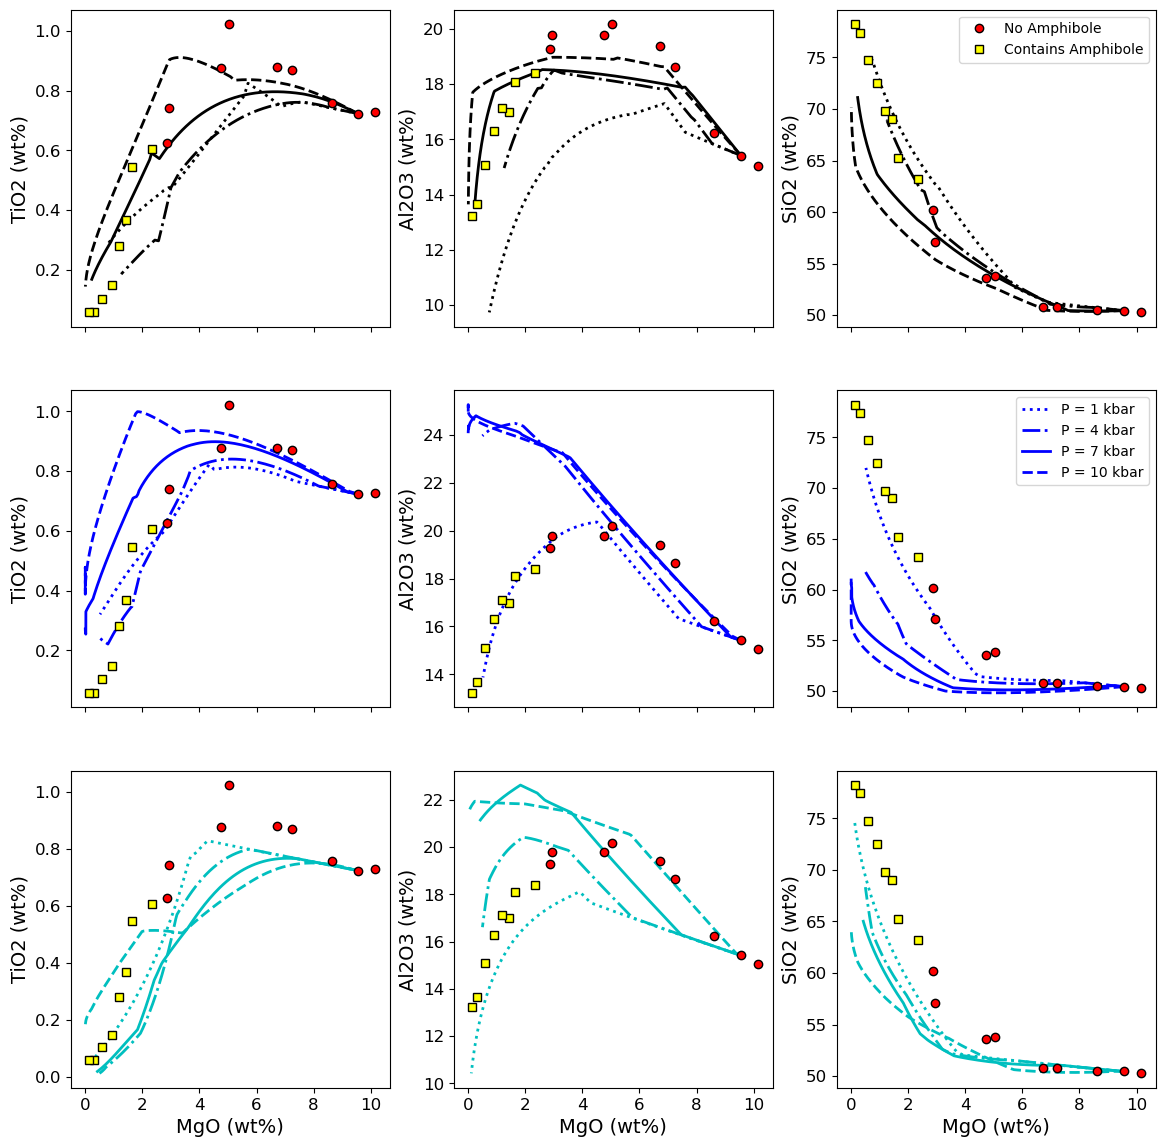

In [8]:
f, a = plt.subplots(3,3, figsize = (14,14), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_MELTSv102:
    Results_MELTSv102[index]['All'][Elements] = 100*Results_MELTSv102[index]['All'][Elements].values/np.nansum(Results_MELTSv102[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv102[index]['All']['SiO2_Liq']),1)
    Results_MELTSv120[index]['All'][Elements] = 100*Results_MELTSv120[index]['All'][Elements].values/np.nansum(Results_MELTSv120[index]['All'][Elements], axis = 1).reshape(len(Results_MELTSv120[index]['All']['SiO2_Liq']),1)
    Results_pMELTS[index]['All'][Elements] = 100*Results_pMELTS[index]['All'][Elements].values/np.nansum(Results_pMELTS[index]['All'][Elements], axis = 1).reshape(len(Results_pMELTS[index]['All']['SiO2_Liq']),1)

for i in range(3):    
    a[0][i].plot(Results_MELTSv120['index = 0']['All']['MgO_Liq'],
             Results_MELTSv120['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'k') 
    a[0][i].plot(Results_MELTSv120['index = 1']['All']['MgO_Liq'],
             Results_MELTSv120['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'k') 
    a[0][i].plot(Results_MELTSv120['index = 2']['All']['MgO_Liq'],
             Results_MELTSv120['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'k')
    a[0][i].plot(Results_MELTSv120['index = 3']['All']['MgO_Liq'],
             Results_MELTSv120['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'k')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red', label = 'No Amphibole')
    a[0][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow', label = 'Contains Amphibole')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
        
    a[1][i].plot(Results_MELTSv102['index = 0']['All']['MgO_Liq'],
             Results_MELTSv102['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'b', label = "P = 1 kbar") 
    a[1][i].plot(Results_MELTSv102['index = 1']['All']['MgO_Liq'],
             Results_MELTSv102['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'b', label = "P = 4 kbar") 
    a[1][i].plot(Results_MELTSv102['index = 2']['All']['MgO_Liq'],
             Results_MELTSv102['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'b', label = "P = 7 kbar")
    a[1][i].plot(Results_MELTSv102['index = 3']['All']['MgO_Liq'],
             Results_MELTSv102['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'b', label = "P = 10 kbar")
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[1][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')

    a[2][i].plot(Results_pMELTS['index = 0']['All']['MgO_Liq'],
             Results_pMELTS['index = 0']['All'][y[i]], ':', linewidth = 2, color = 'c', label = "P = 1 kbar") 
    a[2][i].plot(Results_pMELTS['index = 1']['All']['MgO_Liq'],
             Results_pMELTS['index = 1']['All'][y[i]], '-.', linewidth = 2, color = 'c', label = "P = 4 kbar") 
    a[2][i].plot(Results_pMELTS['index = 2']['All']['MgO_Liq'],
             Results_pMELTS['index = 2']['All'][y[i]], '-', linewidth = 2, color = 'c', label = "P = 7 kbar")
    a[2][i].plot(Results_pMELTS['index = 3']['All']['MgO_Liq'],
             Results_pMELTS['index = 3']['All'][y[i]], '--', linewidth = 2, color = 'c', label = "P = 10 kbar")
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] > 2.65], Exp[y[i]][Exp['MgO_Liq'] > 2.65], 'ok',
                markerfacecolor = 'red')
    a[2][i].plot(Exp['MgO_Liq'][Exp['MgO_Liq'] <= 2.65], Exp[y[i]][Exp['MgO_Liq'] <= 2.65], 'sk',
                markerfacecolor = 'yellow')
    a[2][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[2][i].set_xlabel('MgO (wt%)')
    
a[0][2].legend()
a[1][2].legend()
    
plt.savefig("Nandedkar.eps", dpi = 300, bbox_inches='tight')  

In [18]:
Results_pMELTS['index = 0']['Mass']

,liquid1,olivine1,clinopyroxene1,plagioclase1,water1,spinel1
0,100.025601,0.000000,0.000000,0.000000,0.000000,0.000000
1,99.781050,0.244278,0.000000,0.000000,0.000000,0.000000
2,99.529138,0.253109,0.000000,0.000000,0.000000,0.000000
3,99.280498,0.249840,0.000000,0.000000,0.000000,0.000000
4,99.035077,0.246625,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
165,18.745921,0.000000,0.019900,0.104270,0.004601,0.009805
166,18.617786,0.000000,0.019450,0.102395,0.004493,0.009555
167,18.492235,0.000000,0.019025,0.100577,0.004388,0.009312
168,18.369183,0.000000,0.018622,0.098813,0.004286,0.009076
